# Lab Book For Analysis of Integrating Methods

### 0. Importing the Module and Necessary Functions

In [1]:
import time
import Integrate_me as IM

def f1(x):
    return x 

def f2(x):
    return x**2

def f3(x):
    return x**3

def f5(x):
    return x+x**2 - x**3 + x**5

def f4(x, y):
    return x+y

def Gauss(x):
    return 2.718281828459045**(-x**2) 

def S(x, y, z, w):
    value = 0
    if x**2 + y**2 + z**2 + w**2 <=1:
        value = 1
    return value

def circ(x, y, z, w ):
    return x**2 + y**2 + z**2 + w**2


F1 = IM.Integrator(f1) #50
F2 = IM.Integrator(f2) #1000/3
F3 = IM.Integrator(f3) #2500
F4 = IM.Integrator(f4) #?
F5 = IM.Integrator(f5)
G = IM.Integrator(Gauss)
SPh = IM.Integrator(S)
Circ = IM.Integrator(circ)

start_labtime = time.time()

In [102]:
#Plotter
#RetAn = [nPoints, intvalue, time_taken, error bounds [n, Y] ,j (adaptcalls)]
def plotme(RetAn, realvalue = None, ylim = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 
    import numpy as np
    
    
    #Integral value vs sample points per dim
    plt.figure(0)
    plt.title('Value of Integral as a function of sample points')
    plt.plot(RetAn[0], RetAn[1])
    plt.grid()
    plt.xlabel('Sample Points n')
    plt.ylabel('Int. Value')
    #plt.show()

    #Percentage Diff vs sample points per dim
    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value')
        plt.grid()
        RVlst = [-(realvalue - i)*100 / realvalue for i in RetAn[1]]
        plt.plot(RetAn[0], RVlst, label='%diff')
        if RetAn[3] != None:
            plt.plot(RetAn[3][0], RetAn[3][1], label = 'upper bound', alpha=0.25, color = 'k')
            plt.plot(RetAn[3][0], -RetAn[3][1], label = 'lower bound', alpha=0.25, color = 'k')
        plt.ylim(-10, 10)
        
        if ylim != None:
            plt.ylim(ylim[0], ylim[1])
        
        plt.xlabel('Sample Points n')
        plt.ylabel('Error (%)')
        plt.legend()
        
        '''
        #Convergence as a function of TIME
        plt.figure(3)
        plt.grid()
        plt.title('Convergence as a function of time')
        plt.xlabel('Time to Execute(s)')
        plt.ylabel('Error(%)')
        plt.plot(RetAn[2], RVlst)
        #plt.show()
        '''
    
    #Timing Tests vs sample points per dim
    plt.figure(2)
    plt.grid()
    plt.title('Timing Test')
    plt.xlabel('Sample Points n per dimension')
    plt.ylabel('Time to Execute (s)')
    plt.plot(RetAn[0], RetAn[2])
    #plt.show()
    
    
    #Timing Tests vs Sample Points total and %diff vs calls
    if RetAn[4] != None:
        plt.figure(0)
        plt.clf()
        
        plt.title('Value of Integral as a function of Iterations')
        plt.grid()
        plt.plot(RetAn[4], RetAn[1])
        plt.xlabel('Iterations of Algorithm')
        plt.ylabel('Int. Value')  
    
        plt.figure(2)
        plt.clf()
        plt.grid()
        plt.plot(RetAn[4], RetAn[2])
        plt.title('Percentage Difference from Actual Value')
        plt.xlabel('Iterations of Algorithm')
        plt.ylabel('Time to Execute (s)')
        plt.title('Timing Test')
        
        if realvalue!= None:
            plt.figure(1)
            plt.clf()
            plt.grid()
            plt.ylim(-10, 10)
            plt.plot(RetAn[4], RVlst)
            plt.xlabel('Iterations of Algorithm')
            if ylim != None:
                plt.ylim(ylim[0], ylim[1])
            plt.ylabel('Error (%)')
            plt.title('% Difference vs Number of Iterations of Alg')
    
    plt.show()

In [103]:
#Plotter
#RetAn = [nPoints, intvalue, time_taken, error bounds [n, Y] ,j (adaptcalls)]
def PLOTME(RETAN, LABEL, REALVALUE = None, ylim = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 
    import numpy as np
    
    
    #Integral value vs sample points per dim
    plt.figure(0)
    plt.title('Value of Integral as a function of sample points')
    for i in range(len(RETAN)):
        plt.plot(RETAN[i][0], RETAN[i][1], label= LABEL[i])
    plt.grid()
    plt.xlabel('Sample Points n')
    plt.ylabel('Int. Value')
    plt.legend()

    #Percentage Diff vs sample points per dim
    if REALVALUE != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value')
        plt.grid()
        RVlst = [[-(REALVALUE[j] - i)*100 / REALVALUE[j] for i in RETAN[j][1]] for j in range(len(REALVALUE))]
        for i in range(len(RETAN)):
            plt.plot(RETAN[i][0], RVlst[i], label= LABEL[i])
        plt.ylim(-10, 10)        
        if ylim != None:
            plt.ylim(ylim[0], ylim[1])
        plt.xlabel('Sample Points n per dimension')
        plt.ylabel('Error (%)')
        plt.legend()

    
    #Timing Tests vs sample points per dim
    plt.figure(2)
    plt.grid()
    plt.title('Timing Test')
    plt.xlabel('Sample Points n')
    plt.ylabel('Time to Execute (s)')
    for i in range(len(RETAN)):
        plt.plot(RETAN[i][0], RETAN[i][2], label= LABEL[i])
    plt.legend()
    #plt.show()
    
    
    #Timing Tests vs Sample Points total and %diff vs calls
    if RETAN[0][4] != None:
        plt.figure(0)
        plt.clf()
        
        plt.title('Value of Integral as a function of Iterations')
        plt.grid()
        
        for i in range(len(RETAN)):
            plt.plot(RETAN[i][4], RETAN[i][1], label= LABEL[i])
        plt.xlabel('Iterations of Algorithm')
        plt.legend()
        plt.ylabel('Int. Value')  
    
        plt.figure(2)
        plt.clf()
        plt.grid()
        for i in range(len(RETAN)):
            plt.plot(RETAN[i][4], RETAN[i][2], label= LABEL[i])
        plt.xlabel('Iterations of Algorithm')
        plt.ylabel('Time to Execute (s)')
        plt.legend()
        plt.title('Timing Test')
        
        if REALVALUE!= None:
            plt.figure(1)
            plt.clf()
            plt.grid()
            plt.ylim(-10, 10)
            for i in range(len(RETAN)):
                plt.plot(RETAN[i][4], RVlst[i], label= LABEL[i])
            plt.legend()
            plt.xlabel('Iterations of Algorithm')
            if ylim != None:
                plt.ylim(ylim[0], ylim[1])
            plt.ylabel('Error (%)')
            plt.title('% Difference vs Number of Iterations of Alg')
    
    plt.show()

## Analysis of 1 Dimensional Methods

### 1. Newton-Cotes

Here we start with the basic analysis, analysing only one of the NC Quadrature in one dimension 

In [3]:
def retanalysis(C, a, b, intmethod, Nmax = 500, Ndiffs = 10):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    import numpy as np
    
    start_time = time.time()

    nPoints = [1]
    intvalue = [C.NCInt(a, b, nPoints[0], intmethod)]
    time_taken = [time.time()-start_time]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs

        start_time = time.time()
        tintvalue = C.NCInt(a, b, npoint, intmethod)
        timepast = time.time() - start_time

        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)
    
    n = np.arange(4, nPoints[-1], 0.5)
    if intmethod == 2: 
        Y = ((b-a)**5) *100 / (180 * n**4)
    elif intmethod == 1:
        Y = ((b-a)**3) *100 / (12 * n**2)
    else:
        Y = ((b-a)**3) *100 / (24 * n**2)
    return [nPoints, intvalue, time_taken, [n,Y], None]

#[nPoints, intvalue, time_taken, error bounds]
#[nPoints, intvalue, time_taken, error bounds [n, Y] ,j (adaptcalls)]

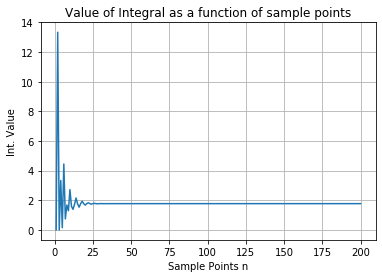

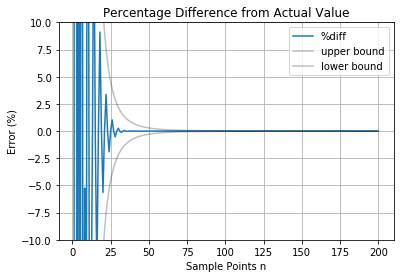

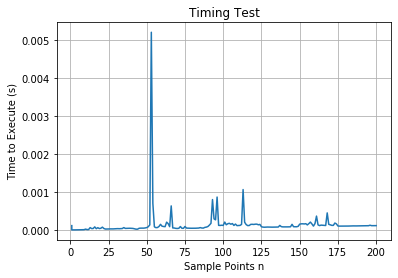

In [47]:
RetAnG = retanalysis(G, -10, 10, 2, Ndiffs = 1, Nmax = 200)
#print(RetAn1)
plotme(RetAnG, realvalue = 1.7724538509)

Now we combine the Analysis together for all three NC Quadratures into one graph

In [5]:
def plotmecombi(C, a, b, Nmax = 500, Ndiffs = 10, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 

    RetAn = [retanalysis(C, a, b, i, Nmax, Ndiffs) for i in range(3)]

    plt.figure(0)
    plt.grid()
    plt.title('Value of Integral as a function of sample points')
    plt.xlabel('Sample Points n')
    plt.ylabel('Int. Value')
    for i in range(3):
        plt.plot(RetAn[i][0], RetAn[i][1], label = 'Int. Approx. Order ' + str(i))
    plt.legend()
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.grid()
        plt.title('Percentage Difference from Actual Value')
        for i in range(3):
            RVlst = [-(realvalue - i)*100 / realvalue for i in RetAn[i][1]]
            plt.plot(RetAn[i][0], RVlst, label = 'Int. Approx. Order ' + str(i))
        plt.legend()
        plt.xlabel('Sample Points n')
        plt.ylabel('Error (%)')
        plt.ylim(-10, 10)
        plt.show()

    plt.figure(2)
    plt.grid()
    plt.title('Timing Test')
    for i in range(3):
        plt.plot(RetAn[i][0], RetAn[i][2], label = 'Int. Approx. Order ' + str(i))
    plt.legend()
    plt.xlabel('Sample Points n')
    plt.ylabel('Time to Execute (s)')
    plt.show()
    


F3


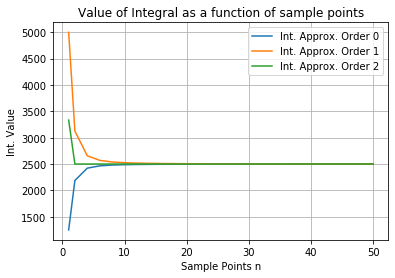

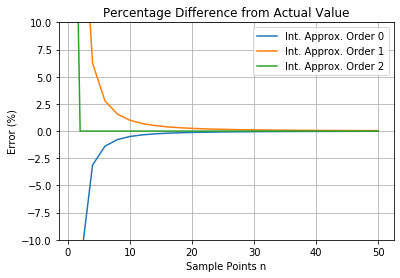

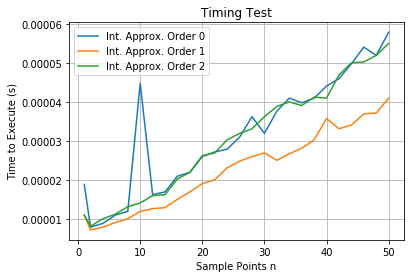

In [6]:
print('F3')    
plotmecombi(F3,0, 10, Nmax = 50, realvalue = 2500, Ndiffs = 2)

F5


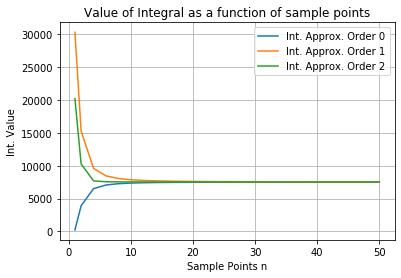

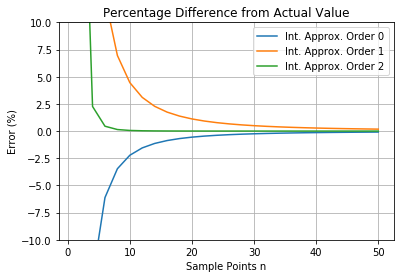

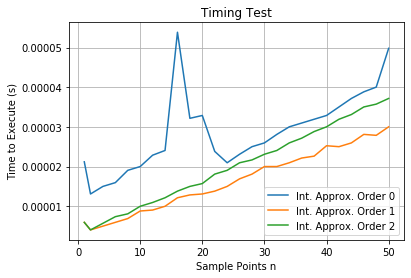

In [50]:
print('F5')
plotmecombi(F5, -2, 6, Nmax = 50, realvalue = 7536, Ndiffs = 2)

Gauss


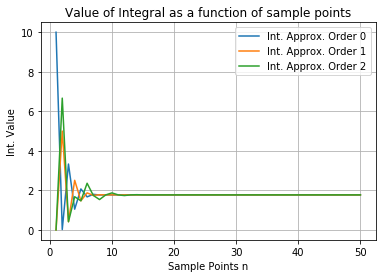

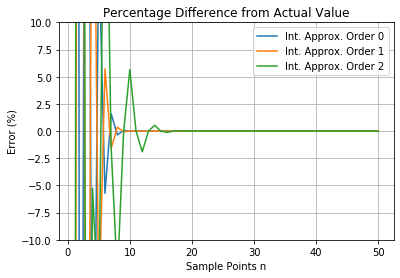

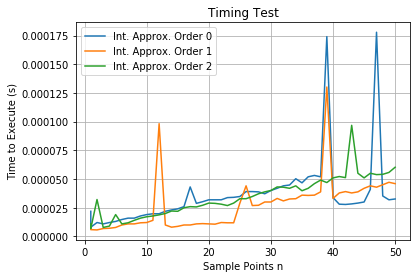

In [49]:
print('Gauss')
plotmecombi(G,-5, 5, Nmax = 50, realvalue = 1.7724538509, Ndiffs = 1)

- converges really quickly in well behaved polynomials
- As expected, simpsons convergest fastest
- Trapezium and Midpoint converge at roughly the same rate, as expected
- Gaussian provides some difficulty to the quadratures 
- midpoint and trap converges quickly there
- while simpsons is at its absolute limit
- however it does follow the error maximum thingy 
- therefore most of the time simpsons is best, with its quick convergence of errors
- however there are certain scenarios in which midpoint and trapz will converge faster

- timing is very similar obviously
- use same algorithm, so should exhibit same behavior
- there are spikes, however thats probably due to some computer process inside, the trends are clearly visible tho


### Adaptive Quadrature

In [9]:
def retanalysisadapt(C, a, b, Taumin10to, intmethod = 2):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()
    
    C.j = 0
    nPoints = [1000]
    intvalue = [C.AdaptInt(a, b, nPoints[0], intmethod)]
    J = [C.j]
    time_taken = [time.time()-start_time]

    for i in range(int(3-Taumin10to)):
        npoint = 1000/(2**i)
        C.j = 0
        start_time = time.time()
        tintvalue = C.AdaptInt(a, b, npoint, intmethod)
        timepast = time.time() - start_time
        J.append(C.j)
        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken, None, J]

In [74]:
RetAd1 = retanalysisadapt(F5, -2, 6, -20, 2)
RetAd2 = retanalysisadapt(G, -10, 10, -24, 2)

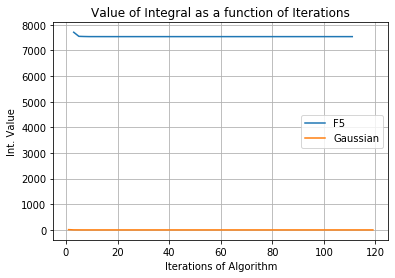

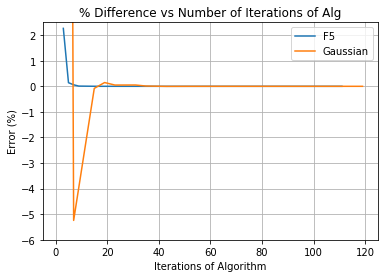

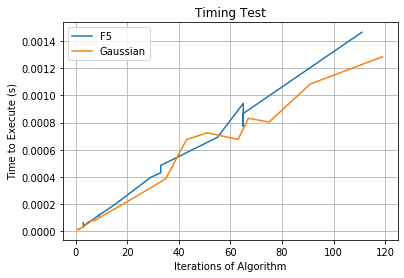

In [78]:
PLOTME([RetAd1, RetAd2], LABEL = ['F5', 'Gaussian'], REALVALUE = [7536, 1.7724538509], ylim = [-6, 2.5])

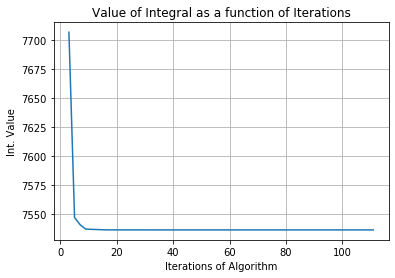

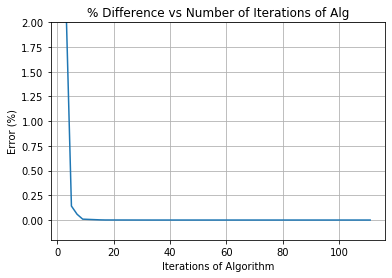

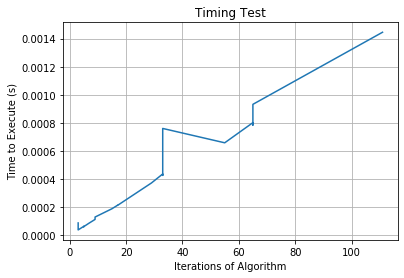

In [73]:
plotme(RetAd1, realvalue = 7536, ylim = [-0.2, 2])

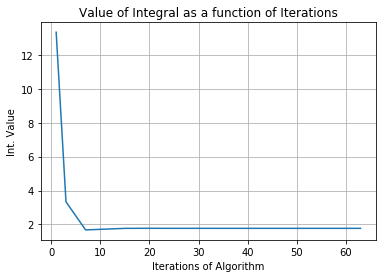

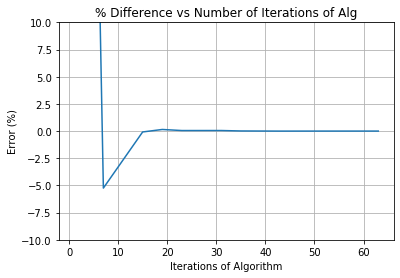

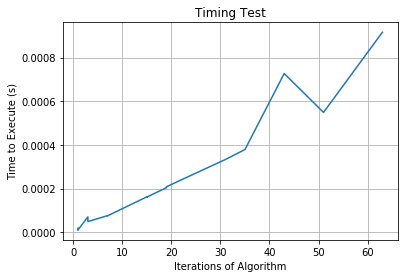

In [13]:
plotme(RetAd2, realvalue = 1.7724538509)

- massive improvement over traiditional methods
- Fast, but its about 10 times slower (I think)
- Works really well for both analytically and nonanalyitcally integratable objects
- Convergence really quickly
- Requires about 20 iterations in the gaussian to converge
- Thought that the recursive function limits its speed, as well as the number of evaluations it has to do

Adaptive integration was a massive improvement over the traditional NC quadratures. Both well behaved polynomials such as f5, as well as non-analytically integrable functions such as the gaussian, it converged to near 0 in less than 10 interations of the algorithm. Given that it uses the exact same NC Int algorithm, this program is extremely fast. However, the recurvise nature of it limits it speed, therefore taking approximately 10 times longer to run to achieve the same error. Overall, as a function of calls this is blazing fast, but as a function of time it is not as fast. However, it is expected in the long run that the less amount of calls it takes to run would win over the timing increaseements compared to others. 

### Monte Carlo

In [14]:
def retanalysismonteN(C, a, b, Nmax = 500, Ndiffs = 10):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    import numpy as np
    start_time = time.time()

    nPoints = [10]
    intvalue = [C.MonteCarloN(a, b, nPoints[0])]
    time_taken = [time.time()-start_time]
    std = [C.vaar ** (1/2)]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs

        start_time = time.time()
        tintvalue = C.MonteCarloN(a, b, npoint)
        timepast = time.time() - start_time

        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)
        std.append(C.vaar**(1/2))




    return [nPoints, intvalue, time_taken, None, None]
#[nPoints, intvalue, time_taken, error bounds [n, Y] ,j (adaptcalls)]




In [79]:
RetMC1 = retanalysismonteN(G, -5, 5, Nmax = 5000, Ndiffs = 10)
RetMC2 = retanalysismonteN(F5, -2, 6, Nmax = 20000)

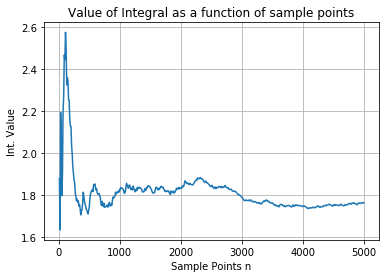

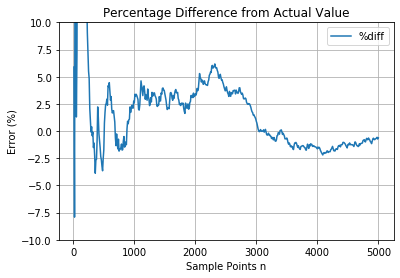

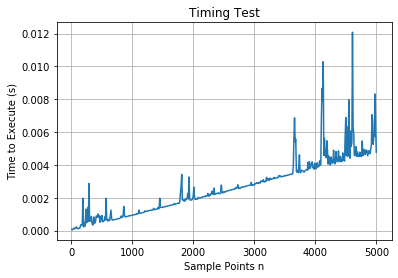

In [16]:
plotme(RetMC1, realvalue = 1.7724538509)

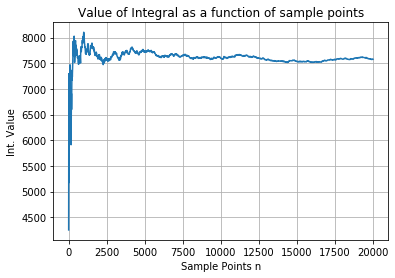

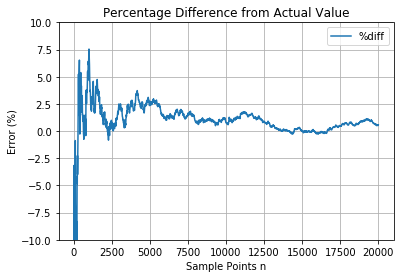

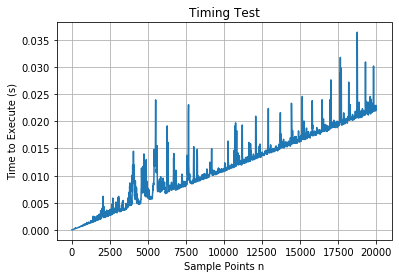

In [80]:
plotme(RetMC2, realvalue = 7536)

- as fast as the others in terms of execution speed
- but much slower convergence 
- convergence can be seen where the fluctuation is not as big as before

### Recursive Stratified Sampling MC

In [18]:
def retanalysisstrat(C, a, b, Ninbins = 1000, Nmax = 500, Ndiffs = 10):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()
    
    nPoints = [1]
    intvalue = [C.StratSamp(a, b, Ninbin = Ninbins, MaxVar = 1e-5, MaxIter = nPoints[0])]
    J = [C.stratcalls]
    time_taken = [time.time()-start_time]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs
        C.i = 0
        start_time = time.time()
        tintvalue = C.StratSamp(a, b, Ninbin = Ninbins, MaxVar = 1e-5, MaxIter = npoint)
        timepast = time.time() - start_time
        J.append(C.stratcalls)
        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken, None, J]

In [19]:
RetSt1 = retanalysisstrat(F5, -2, 6)
RetSt2 = retanalysisstrat(G, -10, 10)

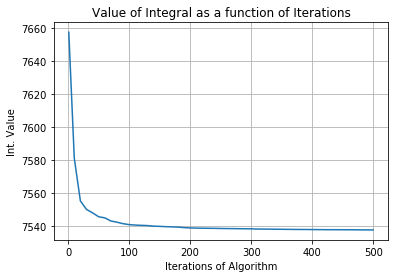

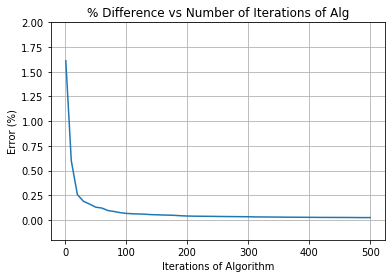

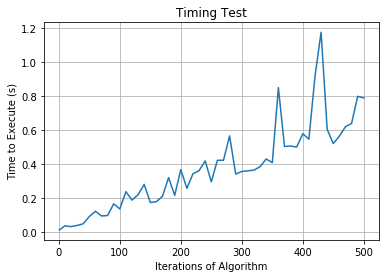

In [20]:
plotme(RetSt1, realvalue = 7536, ylim = [-0.2, 2])

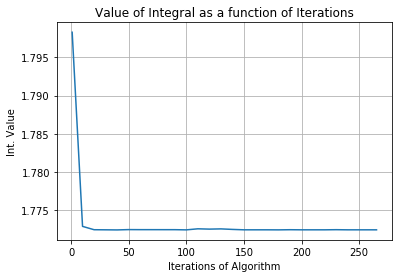

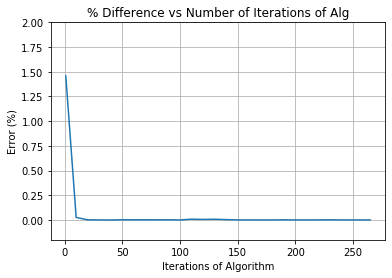

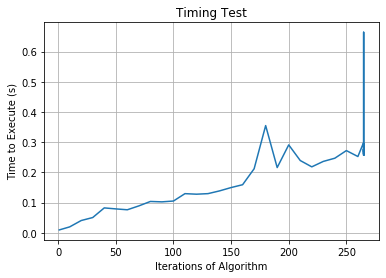

In [21]:
plotme(RetSt2, realvalue = 1.7724538509, ylim = [-0.2, 2])

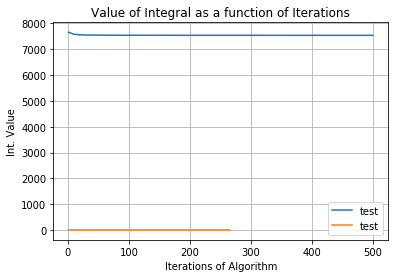

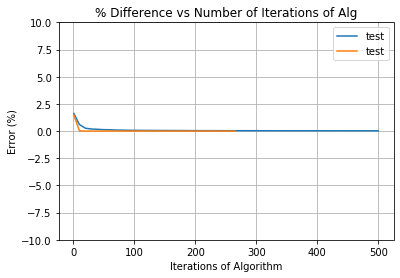

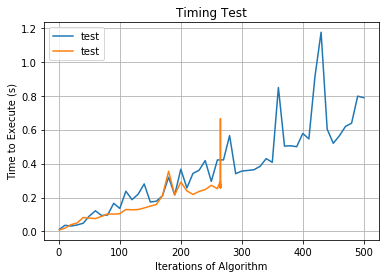

In [83]:
PLOTME([RetSt1, RetSt2], LABEL=['test', 'test'], REALVALUE= [7536, 1.7724538509])

- Much faster convergence than monte carlo methods
- Could possibly surpass NC INT
- does it surpass AdaptINt? 
- well one of them is still better than the other
- still blazing fast
- much preferred over normal sampling methods 

## Analysis of N Dimensional Methods (in 4D)

### 1. Newton Cotes 

In [22]:
def retanalysisN(C, a, b, intmethod, Nmax = 30, Ndiffs = 10):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    import numpy as np
    start_time = time.time()
    
    nPoints = [2]
    Npoints = [nPoints[0] for i in range(len(a))]
    intvalue = [C.NCIntN(a, b, Npoints, intmethod)]
    time_taken = [time.time()-start_time]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs

        start_time = time.time()
        Npoint = [npoint for i in range(len(a))]
        tintvalue = C.NCIntN(a, b, Npoint, intmethod)
        timepast = time.time() - start_time

        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)
        
    return [nPoints, intvalue, time_taken, None , None]

In [23]:
RetAnN1 = retanalysisN(SPh,[-1, -1, -1, -1], [1, 1, 1, 1], 2, Ndiffs = 5, Nmax = 40)

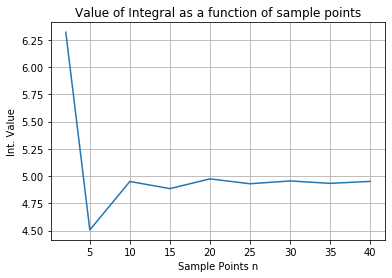

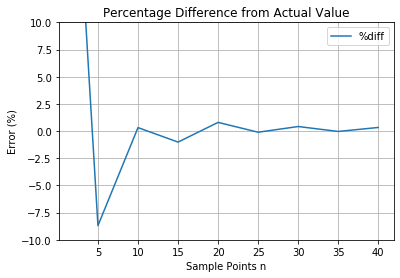

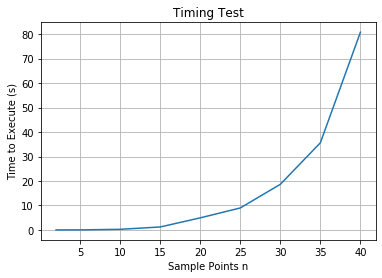

In [24]:
plotme(RetAnN1,realvalue=4.9348022005)

In [27]:
RetAnN2 = retanalysisN(Circ, [-1, -1, -1, -1], [1, 1, 1, 1], 2, Nmax = 60, Ndiffs = 10)

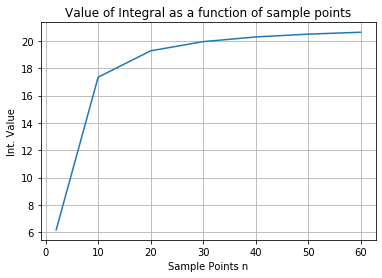

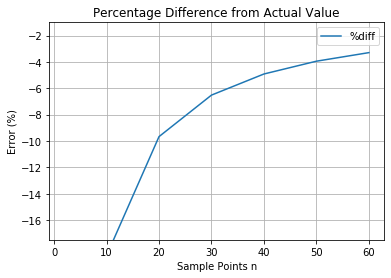

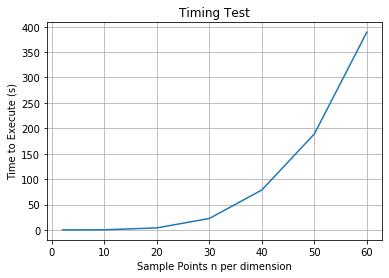

In [106]:
plotme(RetAnN2, realvalue = 64/3, ylim = [-17.5, -1])

- Converges Very slowly now 
- Suffers from curse of dimensionality 
- The time it takes increases polynomially (is that a word)
- Because there are much more points required
- Very bad, as adding an additional point increases it by a lot 

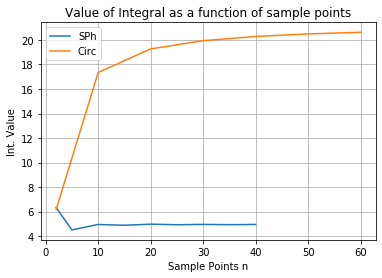

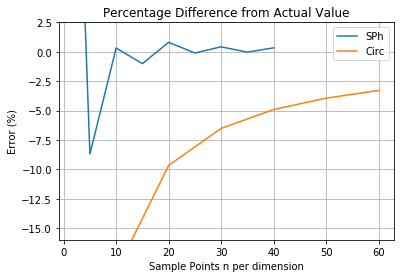

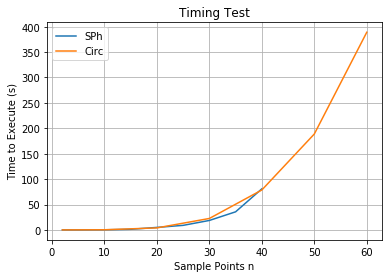

In [107]:
PLOTME([RetAnN1, RetAnN2], LABEL=['SPh', 'Circ'], REALVALUE=[4.9348022005, 64/3], ylim = [-16, 2.5])

### 2. Adaptive Integration

In [29]:
def retanalysisadaptN(C, a, b, Taumin10to, intmethod = 2):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()
    
    C.j = 0
    nPoints = [1000]
    intvalue = [C.AdaptIntN(a, b, nPoints[0], intmethod, N = 2)]
    J = [C.j]
    time_taken = [time.time()-start_time]


    
    for i in range(int(3-Taumin10to)):
        npoint = 1000/10**i
        C.j = 0
        start_time = time.time()
        tintvalue = C.AdaptIntN(a, b, npoint, intmethod, N = 2)
        timepast = time.time() - start_time
        J.append(C.j)
        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

        
          
    
    return [nPoints, intvalue, time_taken, None, J]

In [30]:
RetAdtN1 = retanalysisadaptN(SPh,[-1, -1, -1, -1], [1, 1, 1, 1], -4, intmethod = 2)

In [31]:
print(RetAdtN1)

[[1000, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001], [6.320987654320987, 6.320987654320987, 6.320987654320987, 6.320987654320987, 5.065586419753087, 2.6622299382716044, 2.581259645061728, 2.461504147376543], [0.016798973083496094, 0.011029958724975586, 0.017911911010742188, 0.008932113647460938, 0.11288285255432129, 1.9953560829162598, 1.9563329219818115, 22.054013967514038], None, [1, 1, 1, 1, 17, 257, 273, 2833]]


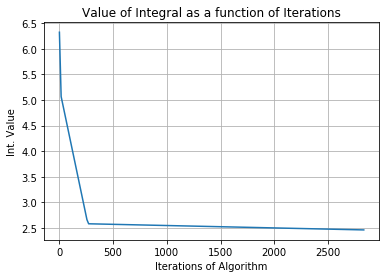

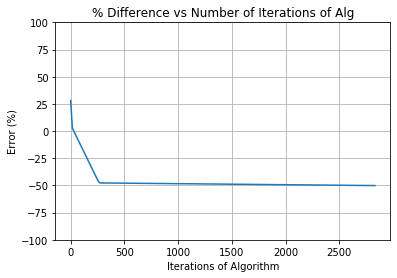

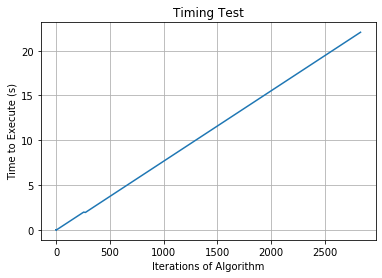

In [32]:
plotme(RetAdtN1, realvalue = 4.9348022005, ylim = [-100, 100])

In [33]:
RetAdtN2 = retanalysisadaptN(Circ,[-1, -1, -1, -1], [1, 1, 1, 1],Taumin10to= -5, intmethod = 2)

In [34]:
print(RetAdtN2)

[[1000, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001], [6.172839506172839, 6.172839506172839, 6.172839506172839, 6.172839506172839, 9.25925925925926, 9.403935185185185, 10.030864197530862, 10.247124565972223, 10.289557186173802], [0.008768081665039062, 0.009768962860107422, 0.009729146957397461, 0.01073002815246582, 0.11321210861206055, 0.19663476943969727, 1.8578770160675049, 23.891842126846313, 67.13879108428955], None, [1, 1, 1, 1, 17, 33, 209, 2145, 7313]]


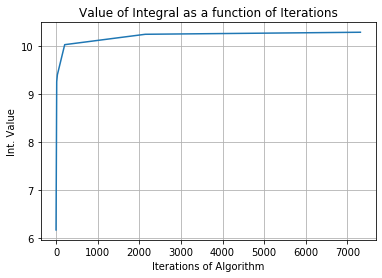

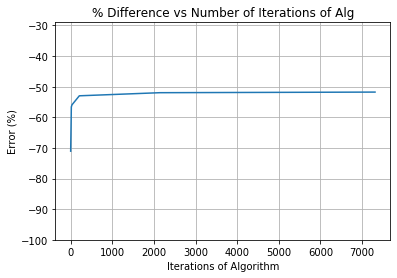

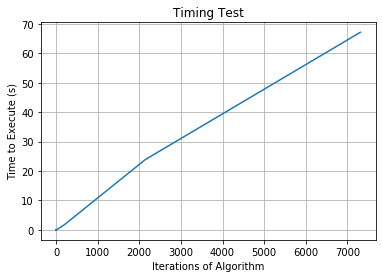

In [105]:
plotme(RetAdtN2, realvalue = 64/3, ylim = [-100, -29])

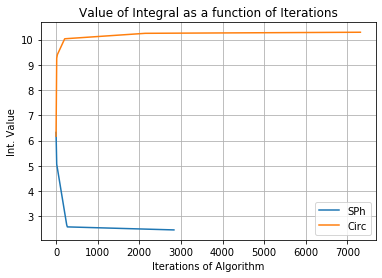

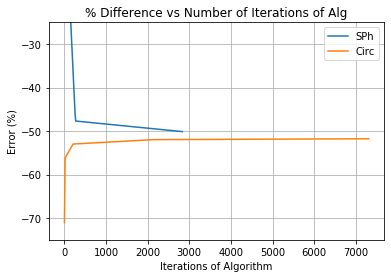

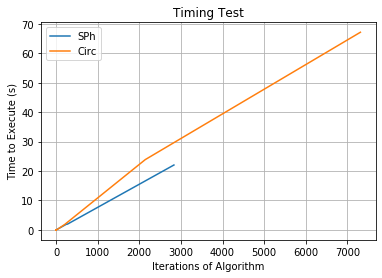

In [104]:
PLOTME([RetAdtN1, RetAdtN2], LABEL = ['SPh', 'Circ'], REALVALUE = [4.9348022005, 64/3], ylim = [-75, -25] )

### 3. Monte Carlo Integration

In [36]:
RetMCN1 = retanalysismonteN(SPh, [-1, -1, -1, -1], [1, 1, 1, 1], Nmax = 5000)

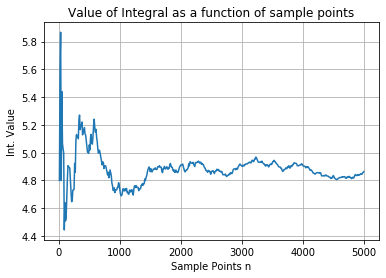

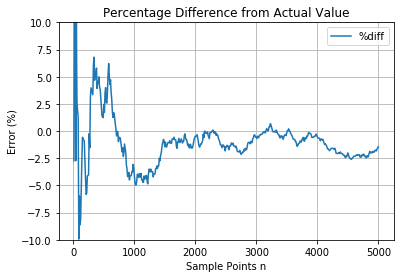

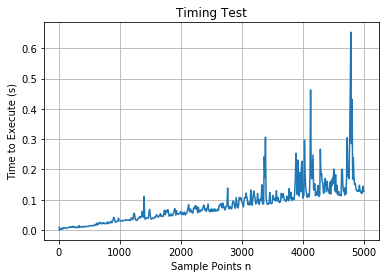

In [37]:
plotme(RetMCN1, realvalue = 4.9348022005)

In [38]:
RetMCN2 = retanalysismonteN(Circ,[-1, -1, -1, -1], [1, 1, 1, 1], Nmax = 10000)

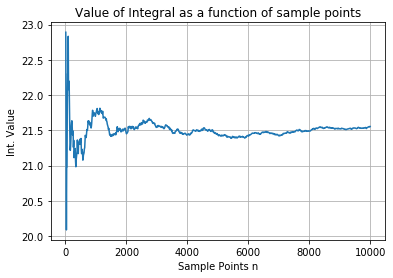

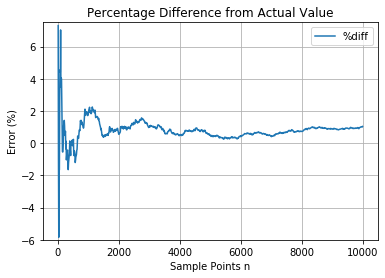

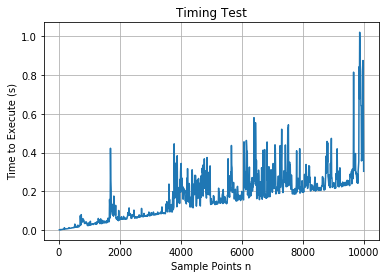

In [39]:
plotme(RetMCN2, realvalue = 64/3, ylim = [-6, 7.5])

- Monte Carlo's behaviour remains unchanged in N dimensions than in one dimension
- Still converges at a rate of 1/√N, which is now desirable compared to NC in higher dimensions
- Even the crude MC is much better than the others


### 4. Recursive Stratified Sampling

In [40]:
def retanalysisstratN(C, A, B, Ninbins = 1000, Nmax = 100, Ndiffs = 10):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()
    
    nPoints = [1]
    intvalue = [C.StratSampN(A, B, Ninbin = Ninbins, MaxVar = 1e-5, MaxIter = nPoints[0])]
    J = [C.stratcalls]
    time_taken = [time.time()-start_time]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs
        C.i = 0
        start_time = time.time()
        tintvalue = C.StratSampN(A, B, Ninbin = Ninbins, MaxVar = 1e-5, MaxIter = npoint)
        timepast = time.time() - start_time
        J.append(C.stratcalls)
        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken, None, J]

In [41]:
RetStratN1 = retanalysisstratN(SPh, [-1, -1, -1, -1], [1, 1, 1, 1])

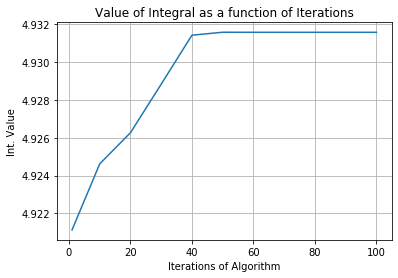

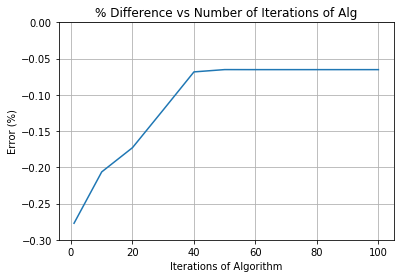

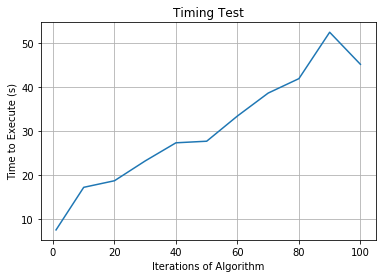

In [42]:
plotme(RetStratN1, realvalue=4.9348022005, ylim = [-0.3, 0])

In [43]:
RetStratN2 = retanalysisstratN(Circ, [-1, -1, -1, -1], [1, 1, 1, 1])

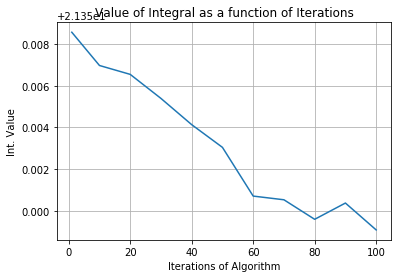

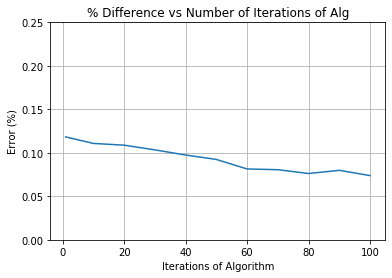

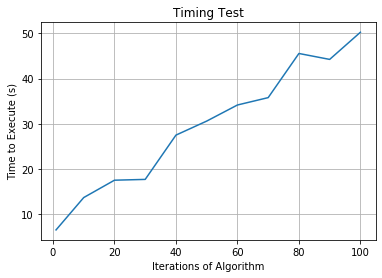

In [44]:
plotme(RetStratN2, realvalue = 64/3, ylim = [0, 0.25])

- Very fast convergence, as even with just one iteration it got down to basically 0% already
- Does take a long time to run the more iterations there are due to the number of splits it needs to do 
- Still fast compared to NCInt
- Seems to also suffer from the Curse of Dimensionality as well, however the effects may not be as large as the others (this one seems more linear, altho requires further study)
- The reason here is obvious, the algorithm used for stratified sampling isnt the best
- proper stratified sampling techniques find which dimension is best suited to split into (see mires or whatever its called)

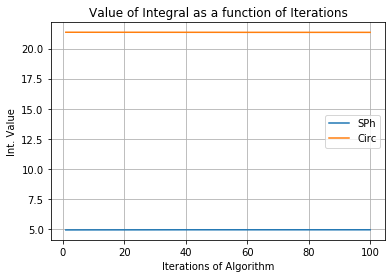

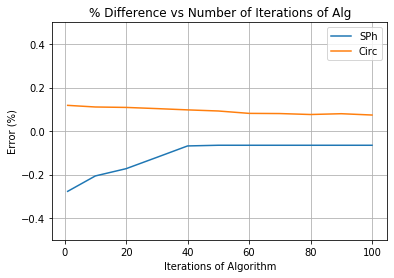

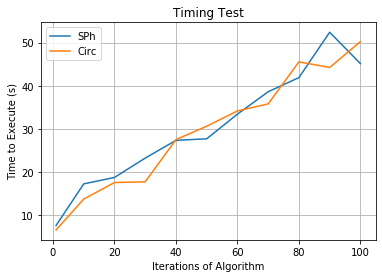

In [98]:
PLOTME([RetStratN1,RetStratN2], REALVALUE = [4.9348022005, 64/3], LABEL = ['SPh', 'Circ'], ylim = [-0.5, 0.5])

In [45]:
final_labtime = time.time()
print('Execution Speed', final_labtime - start_labtime)

Execution Speed 3649.508031129837
